In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import lightgbm as lgb
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

In [9]:
train = pd.read_csv("/Users/nataliechang/Desktop/jupy/summerintern2020/train.csv")
test = pd.read_csv("/Users/nataliechang/Desktop/jupy/summerintern2020/test_public.csv")

In [10]:
train.head()

,TXKEY,DATETIME,CHID,CANO,MCHNO,ACQIC,MCC,CONTP,ETYMD,ECFG,...,CURRENT_CASH_ADV_AMT,CURRENT_FEE,CURRENT_INSTALLMENT_BAL,CURRENT_INSTALLMENT_PURCH_AMT,CURRENT_PURCH_AMT,CURRENT_VIO_AMT,LST_CYCLE_UNPAID_BAL,REVOLVING_AMT,REVOLVING_INTEREST,FRAUD_IND
0,VS0I00120180203AAHPH,2018-02-03 13:52:42,200473230340339563354509,4196756000001,498750000002171,498750,4121,IP,01,1,...,0.0,0.0,0.0,0.0,11922.0,0.0,0.0,0.0,0.0,1
1,VS0I00120180203AAHPJ,2018-02-03 13:52:45,200473230340339563354509,4196756000001,498750000002171,498750,4121,IP,01,1,...,0.0,0.0,0.0,0.0,11922.0,0.0,0.0,0.0,0.0,1
2,VS0I00120180203AAHRO,2018-02-03 13:56:30,200473230340339563354509,4196756000001,498750000002171,498750,4121,IP,01,1,...,0.0,0.0,0.0,0.0,11922.0,0.0,0.0,0.0,0.0,1
3,NC0101020170723AAAI7,2017-07-23 02:05:32,900553230371239763056151,3219169000003,8221330004552,429339,5816,IP,01,1,...,0.0,669.0,82190.0,14814.0,65631.0,0.0,0.0,0.0,0.0,1
4,NC0100620170823AAAHS,2017-08-23 02:07:28,900553230371239763056151,3219169000003,8221330004552,429339,5816,IP,01,1,...,0.0,37.0,101607.0,19697.0,29658.0,0.0,0.0,0.0,0.0,1


In [11]:
alldata = pd.concat((train.loc[:,'TXKEY':'REVOLVING_INTEREST'],
                      test.loc[:,'TXKEY':'REVOLVING_INTEREST']))
print(len(alldata))

1005537


In [54]:
alldata['STOCN']+alldata['SCITY']

0         nl help.uber.com
1         nl help.uber.com
2         nl help.uber.com
3         tw              
4         tw              
                ...       
472330    tw taipei       
472331    tw taipei       
472332    tw taipei       
472333    tw  tp          
472334    tw taipei       
Length: 1005537, dtype: object

In [67]:
set(alldata['CHID'])

{'210563131320239793654013',
 '221523230370539763338315',
 '021483131321239563436955',
 '220523230382839793836073',
 '214463230332239713236728',
 '206483230372439613534796',
 '233483231302539883354466',
 '0154A3230342939523757368',
 '9004B3231301039773635102',
 '2144B3231311139763232489',
 '218463130391439623833099',
 '2274C3130312739823554968',
 '211453231302839713131789',
 '238533231323139853751222',
 '218513231321539733538098',
 '202583131300139653634893',
 '203433230382439723534551',
 '2374C3230390339853656152',
 '244533230311039963656803',
 '211433130360239873252487',
 '216413130332739563358186',
 '205413130382539593336772',
 '200413130382639733057848',
 '225503230331839803739587',
 '230413230371639633631183',
 '228513130320139803556274',
 '2024C3230342039563036883',
 '222443230370539853935008',
 '2064D3130352539593436154',
 '229463230352639663139936',
 '2274E3230322339773337875',
 '264463130311739863950291',
 '2364E3130371139793838541',
 '001573130320939643453275',
 '244413130310

In [70]:
len(set(alldata['CANO']))

138800

In [71]:
cano_count=[]
for i in set(alldata['CANO']):
    a=len([alldata['CANO'] == 'i'])
    cano_count.append(a)
    print(a)

/Users/nataliechang/Desktop/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


KeyboardInterrupt: 

In [44]:
len([alldata['CANO'] == '2479169000003'])

1

Sampling

In [ ]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X,train_data['FRAUD_IND'])

In [1]:
# Since our classes are highly skewed we should make them equivale\t in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df = train.sample(frac=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['FRAUD_IND'] == 1]
non_fraud_df = df.loc[df['FRAUD_IND'] == 0][:76721]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

NameError: name 'train' is not defined

1    0.5
0    0.5
Name: FRAUD_IND, dtype: float64


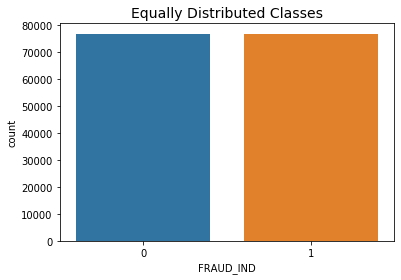

In [4]:
print(new_df['FRAUD_IND'].value_counts()/len(new_df))
sns.countplot('FRAUD_IND', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [5]:
new_df

,TXKEY,DATETIME,CHID,CANO,MCHNO,ACQIC,MCC,CONTP,ETYMD,ECFG,...,CURRENT_CASH_ADV_AMT,CURRENT_FEE,CURRENT_INSTALLMENT_BAL,CURRENT_INSTALLMENT_PURCH_AMT,CURRENT_PURCH_AMT,CURRENT_VIO_AMT,LST_CYCLE_UNPAID_BAL,REVOLVING_AMT,REVOLVING_INTEREST,FRAUD_IND
72575,VS0I00120171214AAJMP,2017-12-14 16:28:52,271413131311339833837239,4102038000002,248748000103177,469216,5734,IP,01,1,...,0.0,72.0,15183.0,5997.0,10833.0,0.0,24688.0,24690.0,481.0,1
53623,MC0I00120171001AAH63,2017-10-01 09:39:38,260463230312639853450409,5213165000001,100000000004202,016120,4722,IP,81,1,...,0.0,0.0,432.0,216.0,1764.0,0.0,59992.0,59988.0,766.0,1
57351,MC0I00120170728AAEHG,2017-07-28 07:42:58,021413130370139473239598,5725000005,210756000200925,004619,5735,IP,81,1,...,0.0,0.0,0.0,0.0,1983.0,0.0,0.0,0.0,0.0,1
1723,VS0I00120171025AAKYX,2017-10-25 18:55:55,200563130351739693553235,4453327000001,210756000200925,431330,5735,IP,01,0,...,0.0,0.0,0.0,0.0,9272.0,0.0,0.0,0.0,0.0,1
14407,MC0I00120170517AAK9W,2017-05-17 15:16:29,250413231321239823652776,3489816000001,210756000200925,004619,5735,IP,81,1,...,0.0,2.0,7602.0,2679.0,19492.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295997,NC0100920171027AAJ2N,2017-10-27 19:59:55,229483130321239843656170,4665164000003,0208001330,493817,7011,IP,05,0,...,0.0,0.0,0.0,0.0,7803.0,0.0,0.0,0.0,0.0,0
197620,ES0100220170612AAAFL,2017-06-12 09:04:29,223463130311539673456751,4469987000001,8080453257,520511,5311,IR,01,0,...,0.0,0.0,20600.0,2575.0,11485.0,0.0,0.0,0.0,0.0,0
120960,NC0100920170510AACWR,2017-05-10 11:00:16,211513230381039743035427,2437552000001,0121000658,493817,4814,IP,01,0,...,0.0,0.0,22012.0,5503.0,24388.0,0.0,0.0,0.0,0.0,0
245798,NC0100620171028AAIIJ,2017-10-28 17:20:19,205483230331639643538102,3089249000002,000001010310002,475500,5912,IP,05,0,...,0.0,3.0,0.0,4614.0,122041.0,0.0,0.0,0.0,0.0,0


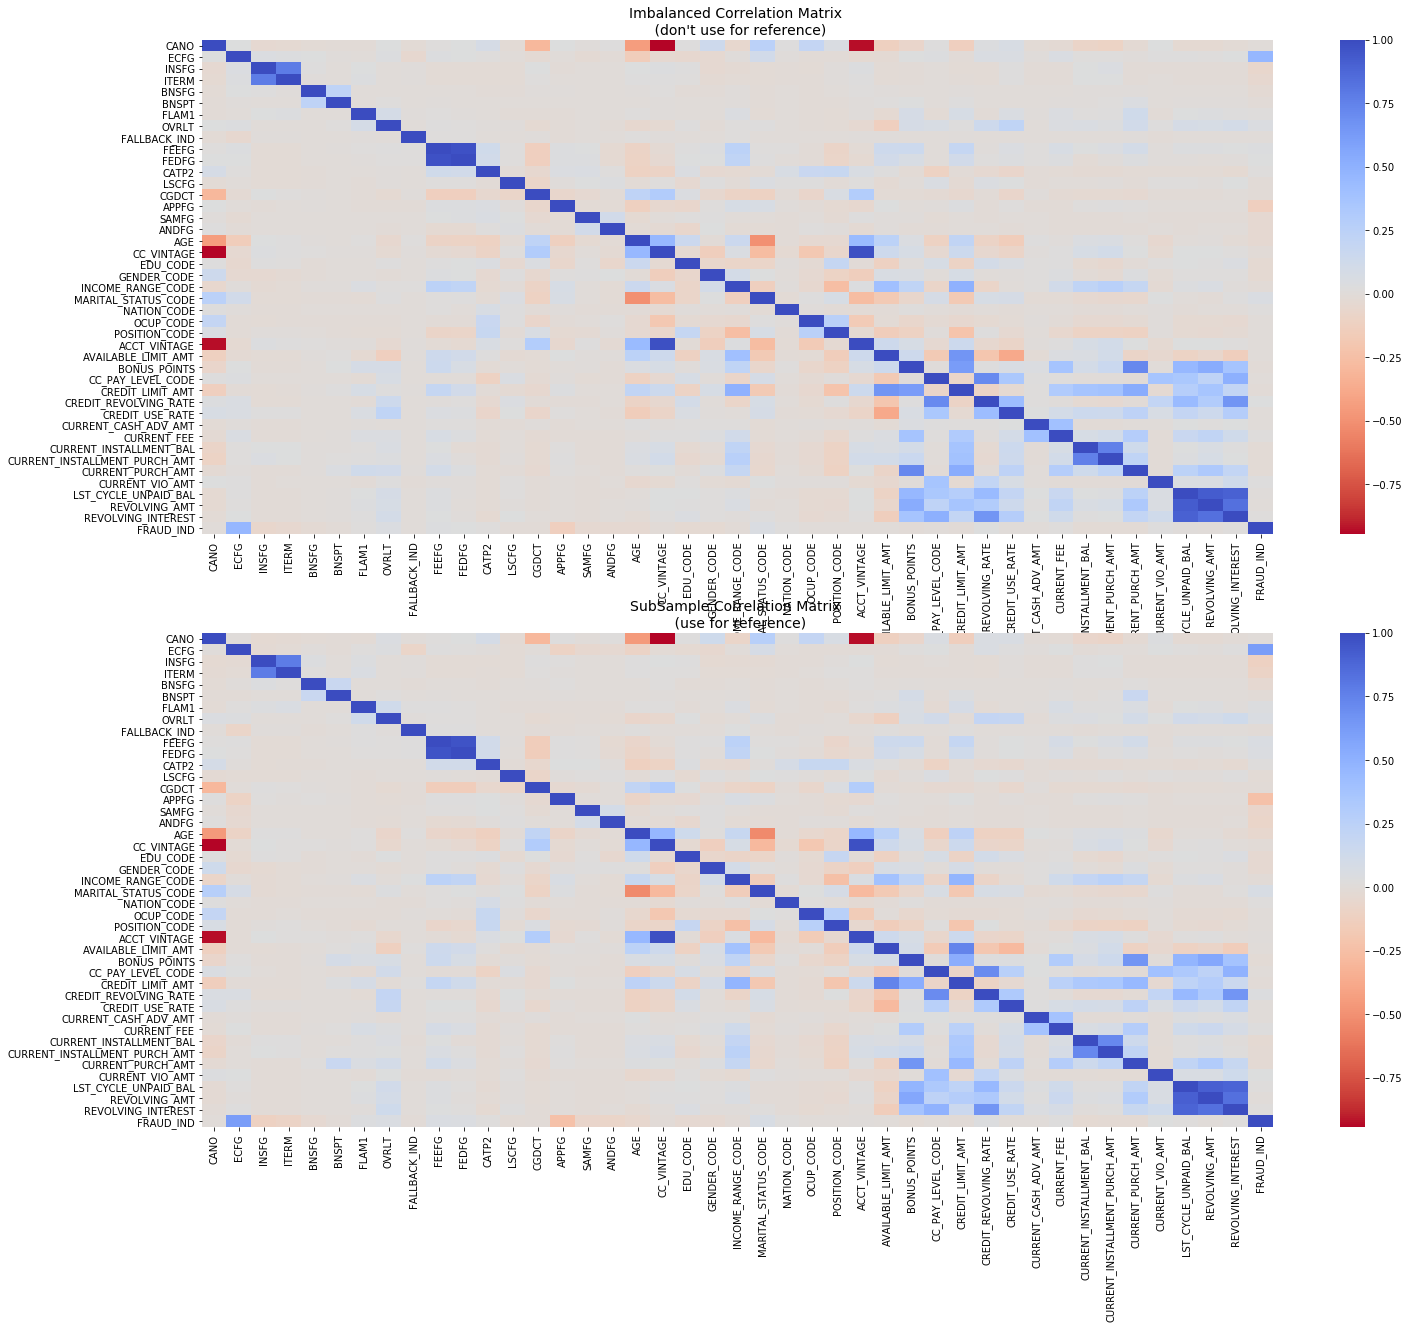

In [6]:
# Make sure we use the subsample in our correlation
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

combine & data cleaning

In [7]:
all_data = pd.concat((new_df.loc[:,'TXKEY':'REVOLVING_INTEREST'],
                      test.loc[:,'TXKEY':'REVOLVING_INTEREST']))
print(len(new_df))

153442


In [8]:
all_data.head()

,TXKEY,DATETIME,CHID,CANO,MCHNO,ACQIC,MCC,CONTP,ETYMD,ECFG,...,CREDIT_USE_RATE,CURRENT_CASH_ADV_AMT,CURRENT_FEE,CURRENT_INSTALLMENT_BAL,CURRENT_INSTALLMENT_PURCH_AMT,CURRENT_PURCH_AMT,CURRENT_VIO_AMT,LST_CYCLE_UNPAID_BAL,REVOLVING_AMT,REVOLVING_INTEREST
72575,VS0I00120171214AAJMP,2017-12-14 16:28:52,271413131311339833837239,4102038000002,248748000103177,469216,5734,IP,01,1,...,0.8543,0.0,72.0,15183.0,5997.0,10833.0,0.0,24688.0,24690.0,481.0
53623,MC0I00120171001AAH63,2017-10-01 09:39:38,260463230312639853450409,5213165000001,100000000004202,016120,4722,IP,81,1,...,0.5246,0.0,0.0,432.0,216.0,1764.0,0.0,59992.0,59988.0,766.0
57351,MC0I00120170728AAEHG,2017-07-28 07:42:58,021413130370139473239598,5725000005,210756000200925,004619,5735,IP,81,1,...,0.0099,0.0,0.0,0.0,0.0,1983.0,0.0,0.0,0.0,0.0
1723,VS0I00120171025AAKYX,2017-10-25 18:55:55,200563130351739693553235,4453327000001,210756000200925,431330,5735,IP,01,0,...,0.0927,0.0,0.0,0.0,0.0,9272.0,0.0,0.0,0.0,0.0
14407,MC0I00120170517AAK9W,2017-05-17 15:16:29,250413231321239823652776,3489816000001,210756000200925,004619,5735,IP,81,1,...,0.1842,0.0,2.0,7602.0,2679.0,19492.0,0.0,0.0,0.0,0.0


In [9]:
all_data = all_data.drop(columns=['TXKEY','DATETIME','CHID','CANO','MCHNO','ACQIC'])
all_data.head()

,MCC,CONTP,ETYMD,ECFG,INSFG,ITERM,BNSFG,BNSPT,FLAM1,STOCN,...,CREDIT_USE_RATE,CURRENT_CASH_ADV_AMT,CURRENT_FEE,CURRENT_INSTALLMENT_BAL,CURRENT_INSTALLMENT_PURCH_AMT,CURRENT_PURCH_AMT,CURRENT_VIO_AMT,LST_CYCLE_UNPAID_BAL,REVOLVING_AMT,REVOLVING_INTEREST
72575,5734,IP,01,1,0,0,0,0,2419.39,us,...,0.8543,0.0,72.0,15183.0,5997.0,10833.0,0.0,24688.0,24690.0,481.0
53623,4722,IP,81,1,0,0,0,0,550.00,gb,...,0.5246,0.0,0.0,432.0,216.0,1764.0,0.0,59992.0,59988.0,766.0
57351,5735,IP,81,1,0,0,0,0,60.00,ie,...,0.0099,0.0,0.0,0.0,0.0,1983.0,0.0,0.0,0.0,0.0
1723,5735,IP,01,0,0,0,0,0,0.00,ie,...,0.0927,0.0,0.0,0.0,0.0,9272.0,0.0,0.0,0.0,0.0
14407,5735,IP,81,1,0,0,0,0,2990.00,ie,...,0.1842,0.0,2.0,7602.0,2679.0,19492.0,0.0,0.0,0.0,0.0


原始資料分析

Text(0.5, 1.0, 'Number of Fraud')

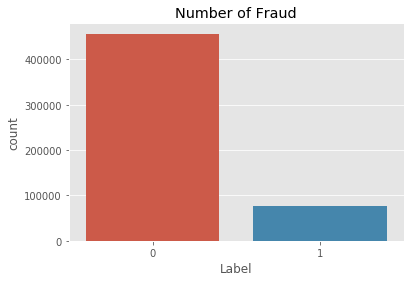

In [10]:
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
plt.style.use('ggplot')

sns.countplot(train.FRAUD_IND)
plt.xlabel('Label')
plt.title('Number of Fraud')

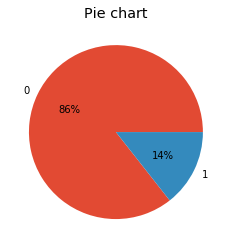

In [11]:
count_Class=pd.value_counts(train["FRAUD_IND"], sort= True)
count_Class.plot(kind = 'pie',autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

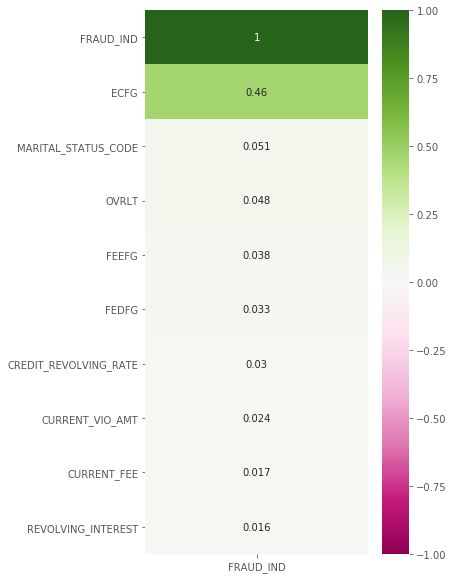

In [12]:
corr_new_train=train.corr()
plt.figure(figsize=(5,10))
sb.heatmap(corr_new_train[['FRAUD_IND']].sort_values(by=['FRAUD_IND'],ascending=False).head(10),vmin=-1, cmap='PiYG', annot=True)

In [13]:
all_data['CC_CUST_LEVEL']

72575     C 
53623     B 
57351     C 
1723      B 
14407     A 
          ..
472330    A 
472331    A 
472332    A 
472333    A 
472334    A 
Name: CC_CUST_LEVEL, Length: 625777, dtype: object

NA值 處理

In [14]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PAY_TYPE,97.331637
POSITION_CODE,7.073127
CC_PAY_LEVEL_CODE,6.502476
REVOLVING_AMT,6.476748
ACCT_VINTAGE,6.476748
AVAILABLE_LIMIT_AMT,6.476748
BONUS_POINTS,6.476748
CREDIT_LIMIT_AMT,6.476748
CREDIT_REVOLVING_RATE,6.476748
REVOLVING_INTEREST,6.476748


In [15]:
all_data["PAY_TYPE"] = all_data["PAY_TYPE"].fillna(0)
all_data["CC_PAY_LEVEL_CODE"] = all_data["CC_PAY_LEVEL_CODE"].fillna(0)
all_data["REVOLVING_AMT"] = all_data["REVOLVING_AMT"].fillna(0)
all_data["ACCT_VINTAGE"] = all_data["ACCT_VINTAGE"].fillna(0)
all_data["AVAILABLE_LIMIT_AMT"] = all_data["AVAILABLE_LIMIT_AMT"].fillna(0)
all_data["BONUS_POINTS"] = all_data["BONUS_POINTS"].fillna(0)
all_data["CREDIT_LIMIT_AMT"] = all_data["CREDIT_LIMIT_AMT"].fillna(0)
all_data["CREDIT_REVOLVING_RATE"] = all_data["CREDIT_REVOLVING_RATE"].fillna(0)
all_data["REVOLVING_INTEREST"] = all_data["REVOLVING_INTEREST"].fillna(0)
all_data["CURRENT_CASH_ADV_AMT"] = all_data["CURRENT_CASH_ADV_AMT"].fillna(0)
all_data["CURRENT_FEE"] = all_data["CURRENT_FEE"].fillna(0)
all_data["CURRENT_INSTALLMENT_BAL"] = all_data["CURRENT_INSTALLMENT_BAL"].fillna(0)
all_data["CURRENT_INSTALLMENT_PURCH_AMT"] = all_data["CURRENT_INSTALLMENT_PURCH_AMT"].fillna(0)
all_data["CURRENT_PURCH_AMT"] = all_data["CURRENT_PURCH_AMT"].fillna(0)
all_data["CURRENT_VIO_AMT"] = all_data["CURRENT_VIO_AMT"].fillna(0)
all_data["LST_CYCLE_UNPAID_BAL"] = all_data["LST_CYCLE_UNPAID_BAL"].fillna(0)
all_data["CREDIT_USE_RATE"] = all_data["CREDIT_USE_RATE"].fillna(0)
all_data["POSITION_CODE"] = all_data["POSITION_CODE"].fillna(0)
all_data["CC_CUST_LEVEL"] = all_data["CC_CUST_LEVEL"].fillna(0)

In [16]:
all_data['CC_CUST_LEVEL'].isna().sum()

0

In [17]:
all_data

,MCC,CONTP,ETYMD,ECFG,INSFG,ITERM,BNSFG,BNSPT,FLAM1,STOCN,...,CREDIT_USE_RATE,CURRENT_CASH_ADV_AMT,CURRENT_FEE,CURRENT_INSTALLMENT_BAL,CURRENT_INSTALLMENT_PURCH_AMT,CURRENT_PURCH_AMT,CURRENT_VIO_AMT,LST_CYCLE_UNPAID_BAL,REVOLVING_AMT,REVOLVING_INTEREST
72575,5734,IP,01,1,0,0,0,0,2419.39,us,...,0.8543,0.0,72.0,15183.0,5997.0,10833.0,0.0,24688.0,24690.0,481.0
53623,4722,IP,81,1,0,0,0,0,550.00,gb,...,0.5246,0.0,0.0,432.0,216.0,1764.0,0.0,59992.0,59988.0,766.0
57351,5735,IP,81,1,0,0,0,0,60.00,ie,...,0.0099,0.0,0.0,0.0,0.0,1983.0,0.0,0.0,0.0,0.0
1723,5735,IP,01,0,0,0,0,0,0.00,ie,...,0.0927,0.0,0.0,0.0,0.0,9272.0,0.0,0.0,0.0,0.0
14407,5735,IP,81,1,0,0,0,0,2990.00,ie,...,0.1842,0.0,2.0,7602.0,2679.0,19492.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472330,5812,IP,07,0,0,0,0,0,676.00,tw,...,0.0536,0.0,0.0,0.0,0.0,16072.0,0.0,0.0,0.0,0.0
472331,5812,IP,07,0,0,0,0,0,1854.00,tw,...,0.0536,0.0,0.0,0.0,0.0,16072.0,0.0,0.0,0.0,0.0
472332,5812,IP,07,0,0,0,0,0,607.00,tw,...,0.0536,0.0,0.0,0.0,0.0,16072.0,0.0,0.0,0.0,0.0
472333,7011,IP,07,0,0,0,0,0,668.00,tw,...,0.0536,0.0,0.0,0.0,0.0,16072.0,0.0,0.0,0.0,0.0


In [23]:
set(all_data['STOCN'])

{'   ',
 '00 ',
 'ad ',
 'ae ',
 'ar ',
 'at ',
 'au ',
 'az ',
 'ba ',
 'bd ',
 'be ',
 'bg ',
 'bn ',
 'bo ',
 'br ',
 'ca ',
 'ch ',
 'ci ',
 'cl ',
 'cn ',
 'co ',
 'cu ',
 'cy ',
 'cz ',
 'de ',
 'dk ',
 'ee ',
 'eg ',
 'es ',
 'fi ',
 'fl ',
 'fr ',
 'ga ',
 'gb ',
 'ge ',
 'gi ',
 'gr ',
 'gt ',
 'gu ',
 'hk ',
 'hr ',
 'hu ',
 'id ',
 'ie ',
 'il ',
 'in ',
 'is ',
 'it ',
 'jo ',
 'jp ',
 'ke ',
 'kg ',
 'kh ',
 'kn ',
 'kr ',
 'kw ',
 'kz ',
 'la ',
 'lb ',
 'li ',
 'lk ',
 'lt ',
 'lu ',
 'lv ',
 'md ',
 'me ',
 'mo ',
 'mt ',
 'mu ',
 'mv ',
 'mx ',
 'my ',
 'na ',
 'ng ',
 'nl ',
 'no ',
 'nz ',
 'pa ',
 'pe ',
 'pg ',
 'ph ',
 'pl ',
 'pt ',
 'pw ',
 'qa ',
 'ro ',
 'ru ',
 'sa ',
 'se ',
 'sg ',
 'si ',
 'sk ',
 'sm ',
 'sz ',
 'th ',
 'tr ',
 'tw ',
 'ua ',
 'um ',
 'us ',
 'va ',
 'vn ',
 'za '}

In [21]:
len(set(all_data['STOCN']))

103

In [298]:
category_col = ['MCC','CONTP','ETYMD','STOCN','SCITY','PAY_TYPE','AGNO','CATP1','CUORG','TSCFG','CC_CUST_LEVEL']
for i in category_col:
    all_data[i] = all_data[i].apply(str)
all_data = pd.get_dummies(all_data, columns=['MCC','CONTP','ETYMD','STOCN','SCITY','PAY_TYPE','AGNO','CATP1','CUORG','TSCFG','CC_CUST_LEVEL'])

In [299]:
all_data.head()

,ECFG,INSFG,ITERM,BNSFG,BNSPT,FLAM1,OVRLT,FALLBACK_IND,FEEFG,FEDFG,...,TSCFG_H,TSCFG_I,TSCFG_N,TSCFG_Y,CC_CUST_LEVEL_0,CC_CUST_LEVEL_A,CC_CUST_LEVEL_B,CC_CUST_LEVEL_C,CC_CUST_LEVEL_D,CC_CUST_LEVEL_E
4322,1,0,0,0,0,1620.00,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
3045,1,0,0,0,0,0.00,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
71625,1,0,0,0,0,30658.72,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
55019,1,0,0,0,0,3050.00,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
21068,0,0,0,0,0,1601.24,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0


MODEL

In [300]:
#creating matrices for sklearn:
X_train = all_data[:new_df.shape[0]]

X_test = all_data[new_df.shape[0]:]

y = new_df['FRAUD_IND']

In [301]:
# New_df is from the random undersample data (fewer instances)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

Validation

In [302]:
X_val.head()

,ECFG,INSFG,ITERM,BNSFG,BNSPT,FLAM1,OVRLT,FALLBACK_IND,FEEFG,FEDFG,...,TSCFG_H,TSCFG_I,TSCFG_N,TSCFG_Y,CC_CUST_LEVEL_0,CC_CUST_LEVEL_A,CC_CUST_LEVEL_B,CC_CUST_LEVEL_C,CC_CUST_LEVEL_D,CC_CUST_LEVEL_E
334593,0,0,0,0,0,970.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
346989,0,0,0,0,0,922.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
42084,1,0,0,0,0,285.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
30159,1,0,0,0,0,152.0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
487360,0,0,0,0,0,723.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [303]:
from sklearn.kernel_ridge import KernelRidge
import lightgbm as lgb
from lightgbm import LGBMRegressor
lgb_regressor=lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=500, 
                                learning_rate=0.002, n_estimators=4500, max_bin=500, bagging_fraction=0.8,
                                bagging_freq=5, bagging_seed=9, feature_fraction=0.7, feature_fraction_seed=9, 
                                min_data_in_leaf=6, min_sum_hessian_in_leaf = 10, reg_lambda=0.1, n_jobs=-1)
lgb_regressor.fit(X_train,y_train)
y_head=lgb_regressor.predict(X_val)
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_val,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_val,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_val,y_head))

----------LGBM----------
R square Accuracy:  0.9133100956962182
Mean Absolute Error Accuracy:  0.05688817083774919
Mean Squared Error Accuracy:  0.021672241336645325


In [304]:
y_val = y_val.tolist()
y_head = y_head.tolist()

In [305]:
y_head = [1 if x > 0.99 else 0 for x in y_head]

In [306]:
from sklearn.metrics import f1_score
print(f1_score(y_val,y_head))
print(f1_score(y_val,y_head, average='weighted'))

0.7291863534165336
0.7075065548510092


Test

In [307]:
y_test = lgb_regressor.predict(X_test)
y_test = y_test.tolist()
#y_test = [1 if x>0.9 else 0 for x in y_test]

In [308]:
#y_test = y_test.tolist()
y_test = [1 if x > 0.99 else 0 for x in y_test]

In [309]:
print(y_test)

[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [310]:
y_test.count(1)/len(y_test)

0.0016810102998930843

In [311]:
len(y_test)

472335

In [312]:
solution = pd.DataFrame({"TXKEY":test.TXKEY, "FRAUD_IND":y_test})
solution.to_csv("credit_sol.csv", index = False)

In [313]:
solution.head()

,TXKEY,FRAUD_IND
0,ES0100920180318AABPO,0
1,ES0100A20180318AABQO,0
2,VS0I00120180302AABVX,0
3,VS0I00120180302AACO5,0
4,VS0I00120180319AABMI,1


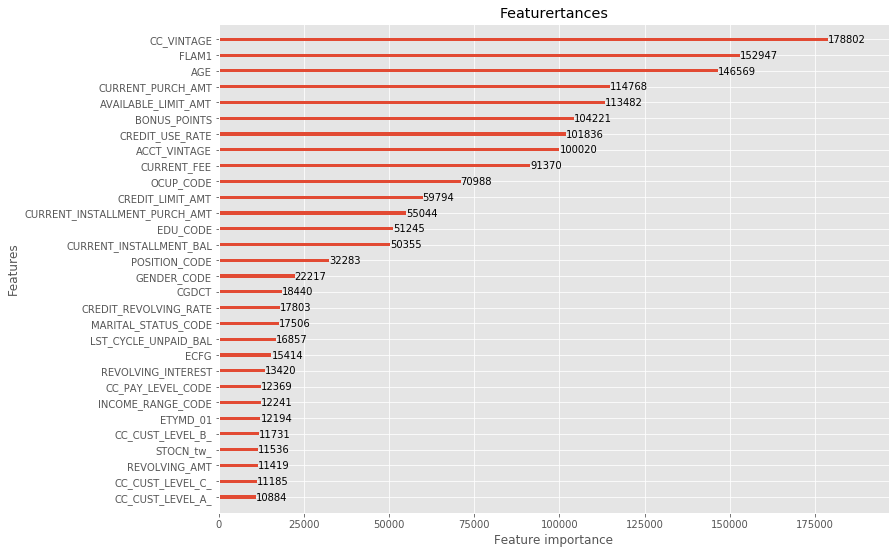

In [314]:
lgb.plot_importance(lgb_regressor, max_num_features=30,figsize=(12,9))
plt.title("Featurertances")
plt.show()

dataframe combine practice

In [9]:
import pandas as pd

cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Price': [22000,25000,27000,35000]
        }

df1 = pd.DataFrame(cars, columns = ['Brand', 'Price'])

print (df1)
print(type(df1))

fraud = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus'],
         'Fraud':[1,1,1]
        }

df2 = pd.DataFrame(fraud, columns = ['Brand', 'Fraud'])

print (df2)
print(type(df2))

            Brand  Price
0     Honda Civic  22000
1  Toyota Corolla  25000
2      Ford Focus  27000
3         Audi A4  35000
<class 'pandas.core.frame.DataFrame'>
            Brand  Fraud
0     Honda Civic      1
1  Toyota Corolla      1
2      Ford Focus      1
<class 'pandas.core.frame.DataFrame'>


In [2]:
list_1=[]
for i in range(len(df1)):
    if df1['Brand'][i] in df2['Brand'].tolist():
        a = 1
    else:
        a = 0
        
    list_1.append(a)

In [3]:
list_1

[1, 1, 1, 0]

In [4]:
df_1 = pd.DataFrame(list_1,columns=['Fraud'])
df_1

,Fraud
0,1
1,1
2,1
3,0


In [5]:
#res = pd.merge(df1,df_1)
#print(res)
res = pd.concat([df1,df_1],axis=1)
print(res)

            Brand  Price  Fraud
0     Honda Civic  22000      1
1  Toyota Corolla  25000      1
2      Ford Focus  27000      1
3         Audi A4  35000      0
